## **Chapter 7**
# Exploratory data analysis
This will show us how to do EDA using python.

# Three important steps to keep in mind.

1. Understand the data.
2. Clean the data.
3. Find a relationship bewteen data.

In [193]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [194]:
kashti=sns.load_dataset("titanic")

In [195]:
kashti.to_csv("kashti.csv")

In [196]:
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [197]:
ks=kashti

In [198]:
ks.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [199]:
#rows and coulnms
ks.shape

(891, 15)

In [200]:
ks.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [201]:
#unique values
ks.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [202]:
#column names
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [203]:
ks["sex"].unique()

array(['male', 'female'], dtype=object)

In [204]:
ks['alone'].unique()

array([False,  True])

In [205]:
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [206]:
ks['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Cleaning and flitering the data

In [207]:
#Find missing values inside. True mean null values here.
ks.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [208]:
ks.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [209]:
#to remove missing value coulmn (Cleaning data)
ks_clean=ks.drop(["deck"],axis=1)
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [210]:
ks_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [211]:
ks_clean=ks_clean.dropna()

In [212]:
ks_clean.shape

(712, 14)

In [213]:
ks_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [214]:
ks_clean.shape

(712, 14)

In [215]:
ks.shape

(891, 15)

In [216]:
ks_clean["age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [217]:
#Basic statistics
ks.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [218]:
ks_clean.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [219]:
ks.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot:xlabel='sex', ylabel='age'>

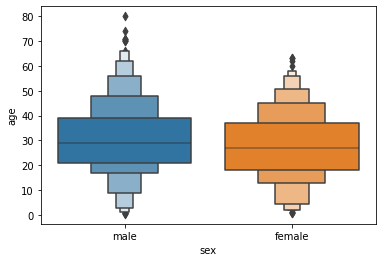

In [220]:
sns.boxenplot(x="sex", y="age", data=ks)

<AxesSubplot:xlabel='sex', ylabel='age'>

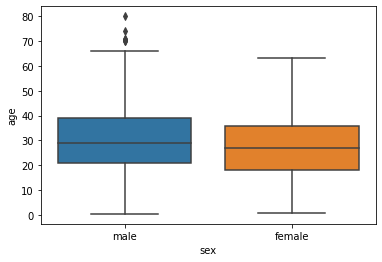

In [221]:
sns.boxplot(x="sex", y="age", data=ks_clean)

<AxesSubplot:ylabel='age'>

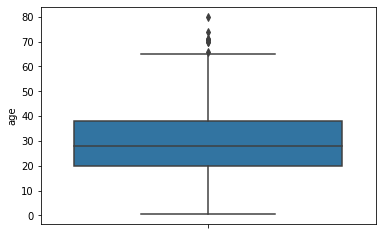

In [222]:
sns.boxplot(y="age", data=ks_clean)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

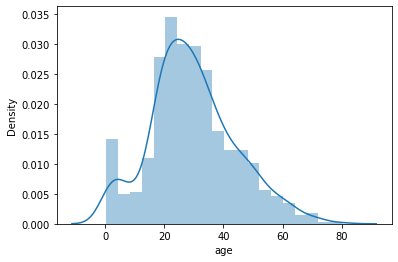

In [223]:
sns.distplot(ks_clean["age"])

In [224]:
ks_clean["age"].shape

(712,)

In [225]:
# How to remove outlier?
ks_clean["age"].mean()

29.64209269662921

In [226]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [227]:
ks_clean["age"].shape

(712,)

In [228]:
ks_clean=ks_clean[ks_clean["age"] < 68]

In [229]:
ks_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:ylabel='age'>

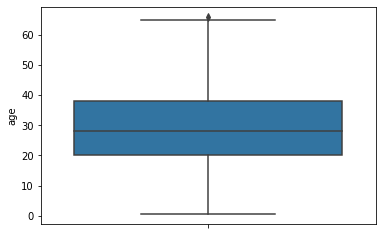

In [230]:
ks_clean.shape
sns.boxplot(y="age", data=ks_clean)

<AxesSubplot:>

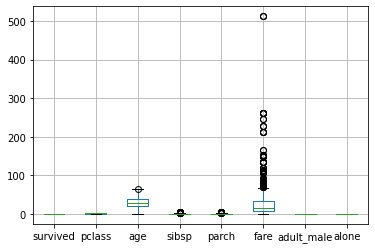

In [231]:
ks_clean.boxplot()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

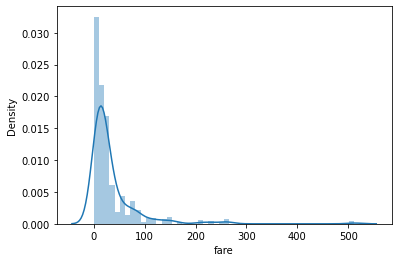

In [232]:
sns.distplot(ks_clean["fare"])

<AxesSubplot:ylabel='fare'>

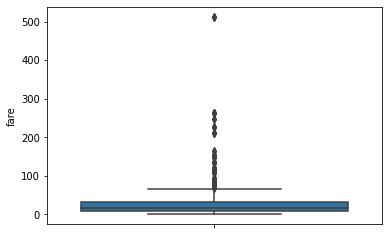

In [233]:
sns.boxplot(y="fare", data=ks_clean)

In [234]:
ks_clean["fare"].shape

(705,)

In [235]:
ks_clean["fare"].mean()

34.610921418439716

In [236]:
ks_clean=ks_clean[ks_clean["age"] < 60]


In [237]:
ks_clean["fare"].shape

(687,)

<AxesSubplot:ylabel='fare'>

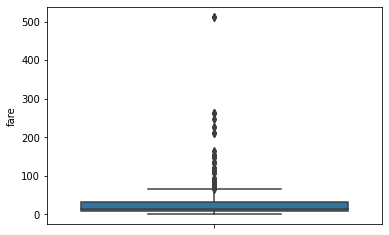

In [238]:
sns.boxplot(y="fare", data=ks_clean)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

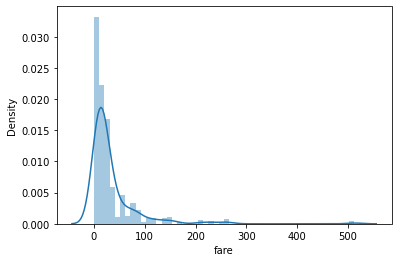

In [271]:
sns.distplot(ks_clean["fare"])

In [269]:
# Log transformation
ks_clean["fare_log"]=np.log(ks_clean["fare"])
ks_clean.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


<AxesSubplot:xlabel='sex', ylabel='fare_log'>

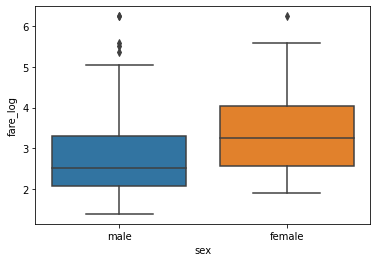

In [273]:
sns.boxplot(x="sex", y="fare_log", data=ks_clean)

<AxesSubplot:xlabel='sex', ylabel='fare'>

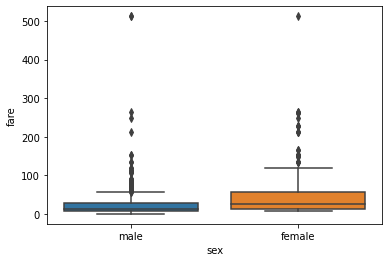

In [274]:
sns.boxplot(x="sex", y="fare", data=ks_clean)

<AxesSubplot:>

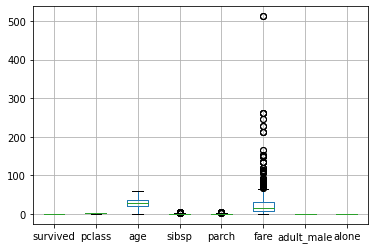

In [240]:
ks_clean.boxplot()

<AxesSubplot:ylabel='sibsp'>

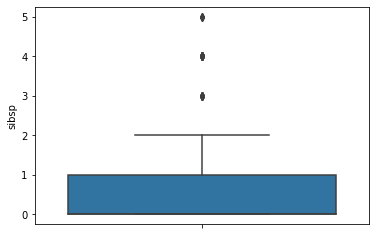

In [241]:
sns.boxplot(y="sibsp", data=ks_clean)

In [242]:
ks_clean=ks_clean[ks_clean["sibsp"]<5]

<AxesSubplot:>

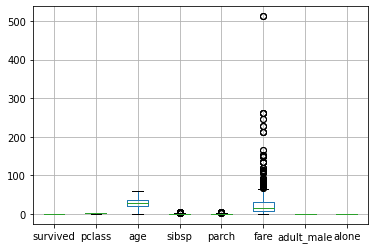

In [243]:
ks_clean.boxplot()

In [244]:
ks=ks[ks["sibsp"]<3]

<AxesSubplot:ylabel='sibsp'>

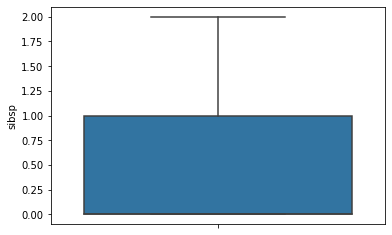

In [245]:
sns.boxplot(y="sibsp", data=ks)

In [246]:
ks_clean["sibsp"].shape

(682,)

In [247]:
ks_clean["fare"].shape

(682,)

array([[<AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>],
       [<AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>]], dtype=object)

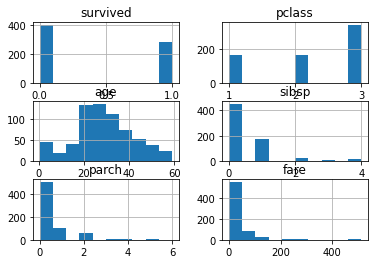

In [248]:
ks_clean.hist()

<AxesSubplot:>

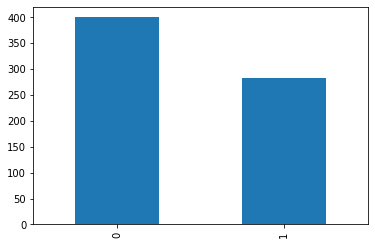

In [249]:
pd.value_counts(ks_clean["survived"]).plot.bar()

In [250]:
ks_clean.groupby(["sex", "class"]).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.962963     1.0  33.567901  0.543210  0.518519  109.410186   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460000     3.0  21.395000  0.790000  0.950000   15.628001   
male   First   0.436782     1.0  37.395632  0.402299  0.310345   73.540948   
       Second  0.147368     2.0  29.319263  0.378947  0.242105   21.260000   
       Third   0.155102     3.0  26.126204  0.424490  0.232653   11.673671   

               adult_male     alone  
sex    class                         
female First     0.000000  0.370370  
       Second    0.000000  0.405405  
       Third     0.000000  0.370000  
male   First     0.965517  0.505747  
       Second    0.905263  0.631579  
       Third     0.902041  0.746939

In [251]:
ks.groupby(["sex", "class"]).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.967391     1.0  34.879518  0.500000  0.423913  102.715489   
       Second  0.920000     2.0  28.705479  0.453333  0.613333   21.983056   
       Third   0.547619     3.0  23.305556  0.412698  0.682540   13.578937   
male   First   0.371901     1.0  41.504200  0.289256  0.264463   65.608161   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.142415     3.0  28.112906  0.188854  0.126935   10.577267   

               adult_male     alone  
sex    class                         
female First     0.000000  0.369565  
       Second    0.000000  0.426667  
       Third     0.000000  0.476190  
male   First     0.975207  0.619835  
       Second    0.916667  0.666667  
       Third     0.969040  0.817337

In [252]:
ks.groupby(["sex", "class","who"]).mean()

survived  pclass        age     sibsp     parch  \
sex    class  who                                                      
female First  child  0.666667     1.0  10.333333  0.666667  1.666667   
              man         NaN     NaN        NaN       NaN       NaN   
              woman  0.977528     1.0  35.800000  0.494382  0.382022   
       Second child  1.000000     2.0   6.600000  0.700000  1.300000   
              man         NaN     NaN        NaN       NaN       NaN   
              woman  0.907692     2.0  32.214286  0.415385  0.507692   
       Third  child  0.714286     3.0   7.523810  0.666667  0.809524   
              man         NaN     NaN        NaN       NaN       NaN   
              woman  0.514286     3.0  28.108696  0.361905  0.657143   
male   First  child  1.000000     1.0   5.306667  0.666667  2.000000   
              man    0.355932     1.0  42.623711  0.279661  0.220339   
              woman       NaN     NaN        NaN       NaN       NaN   
       Second child  1.000000     2.0   2.258889  0.888889  1.222222   
              man    0.080808     2.0  33.588889  0.292929  0.131313   
              woman       NaN     NaN        NaN       NaN       NaN   
       Third  child  0.800000     3.0   7.042000  0.600000  1.000000   
              man    0.121406     3.0  29.053571  0.175719  0.099042   
              woman       NaN     NaN        NaN       NaN       NaN   

                           fare  adult_male     alone  
sex    class  who                                      
female First  child  160.962500         0.0  0.000000  
              man           NaN         NaN       NaN  
              woman  100.752107         0.0  0.382022  
       Second child   29.240000         0.0  0.000000  
              man           NaN         NaN       NaN  
              woman   20.866603         0.0  0.492308  
       Third  child   15.060719         0.0  0.238095  
              man           NaN         NaN       NaN  
              woman   13.282580         0.0  0.523810  
male   First  child  117.802767         0.0  0.000000  
              man     64.281180         1.0  0.635593  
              woman         NaN         NaN       NaN  
       Second child   27.306022         0.0  0.000000  
              man     19.054124         1.0  0.727273  
              woman         NaN         NaN       NaN  
       Third  child   14.228340         0.0  0.100000  
              man     10.460619         1.0  0.840256  
              woman         NaN         NaN       NaN

<AxesSubplot:>

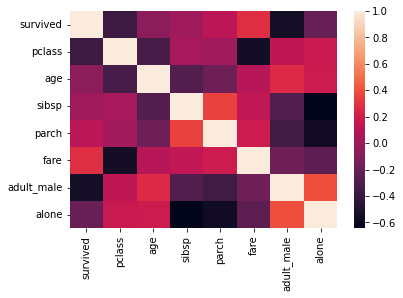

In [257]:
sns.heatmap(cor_ks_clean)

<AxesSubplot:>

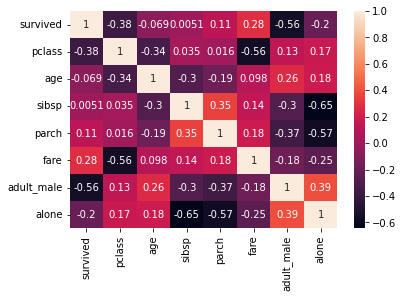

In [258]:
sns.heatmap(cor_ks_clean, annot=True)

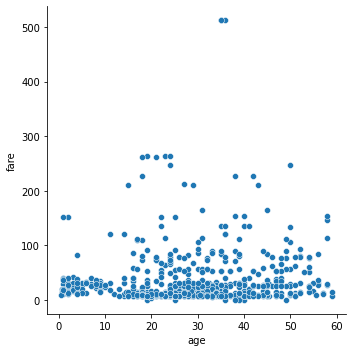

In [259]:
sns.relplot(x="age",y="fare", data=ks_clean)

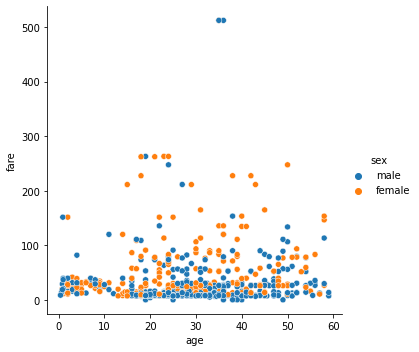

In [261]:
sns.relplot(x="age",y="fare",hue="sex", data=ks_clean)

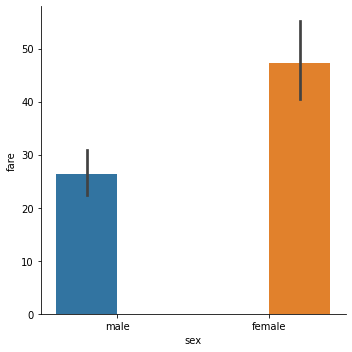

In [263]:
sns.catplot(x="sex",y="fare",hue="sex", data=ks_clean, kind="bar")

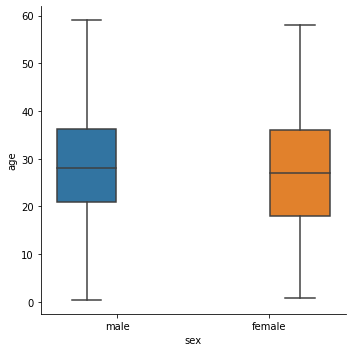

In [265]:
sns.catplot(x="sex",y="age",hue="sex", data=ks_clean, kind="box")

<AxesSubplot:xlabel='sex', ylabel='fare_log'>

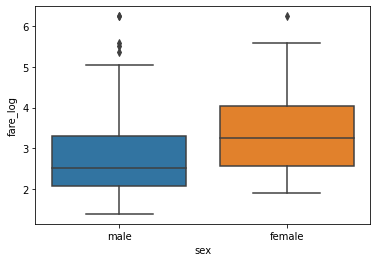

In [275]:
sns.boxplot(x="sex", y="fare_log", data=ks_clean)